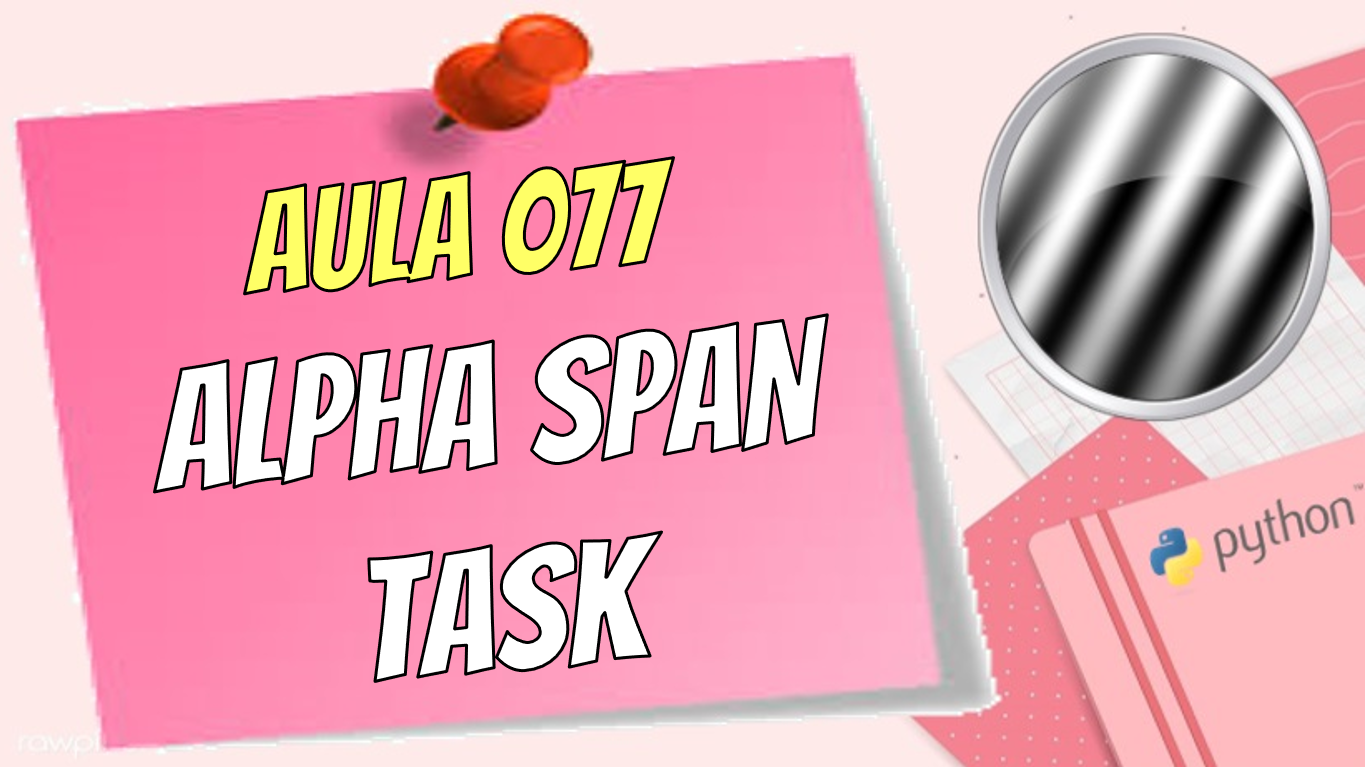

In [22]:
import random
import locale

locale.setlocale(locale.LC_COLLATE, 'pt_BR.UTF-8')
teste = ["aveia", "árvore", "abacate"]
print(sorted(teste, key = locale.strxfrm))


words = ['água', 'agulha', 'animal', 'aranha', 'areia', 'árvore',
         'asa', 'bala', 'baleia', 'banana', 'banco', 'banho', 'barba',
         'barco', 'beijo', 'bicho', 'blusa', 'bocejo', 'bolo', 'bolso',
         'boneca', 'botão', 'brinco', 'bule', 'bíblia', 'cabelo', 'cabeça',
         'cabra', 'cadeia', 'café', 'caixão', 'caju', 'calo', 'calça', 'cama',
         'camisa', 'caneta', 'cantor', 'carro', 'carta', 'casa', 'casaco', 'cesto',
         'chapéu', 'chuchu', 'chute', 'chuva', 'chá', 'chão', 'cidade', 'cinto', 'circo',
         'comida', 'copo', 'coroa', 'corpo', 'couve', 'cárie', 'céu', 'dança', 'dedo',
         'dente', 'disco', 'escola', 'escova', 'estojo', 'farda', 'farelo', 'ferida',
         'filho', 'fio', 'flor', 'fogão', 'fogo', 'fruta', 'gato', 'gelo', 'girafa', 'goiaba',
         'gol', 'gola', 'gordo', 'gosma', 'grade', 'grama', 'haste', 'homem', 'igreja',
         'inseto', 'janela', 'jardim', 'jaula', 'juba', 'lã', 'ladrão', 'lagoa', 'lancha',
         'lanche', 'lápis', 'lata', 'látex', 'leão', 'leite', 'letra', 'linha', 'livro',
         'lixa', 'lixo', 'louça', 'lua', 'mãe', 'magro', 'manga', 'mão', 'mar', 'marcha',
         'marido', 'marte', 'massa', 'mastro', 'médico', 'meia', 'mel', 'menina', 'mesa',
         'metal', 'morro', 'mosca', 'moto', 'motor', 'móvel', 'mulher', 'muro', 'nadar',
         'nariz', 'neve', 'nudez', 'nuvens', 'objeto', 'pai', 'panela', 'pano', 'pão',
         'papel', 'parede', 'pátio', 'pato', 'pé', 'pedra', 'peixe', 'pele', 'pêra',
         'perna', 'pessoa', 'picada', 'pires', 'pneu', 'pó', 'ponte', 'porco', 'porta',
         'prato', 'prisão', 'prova', 'prédio', 'pulmão', 'quarto', 'queijo', 'rádio',
         'rainha', 'rede', 'rio', 'rocha', 'roda', 'rosa', 'roupa', 'rua', 'saco',
         'saia', 'sala', 'salada', 'sangue', 'sapato', 'selva', 'serra', 'sofá', 'sol',
         'sopa', 'suco', 'tabaco', 'tampa', 'tecido', 'teia', 'tênis', 'tinta', 'torta',
         'tosse', 'tricô', 'trigo', 'trono', 'túmulo', 'unha', 'uva', 'vaca', 'veneno',
         'vidro', 'violão', 'vulcão', 'xadrez', 'xícara']

print(len(words))

['abacate', 'árvore', 'aveia']
210


In [21]:
# total de palavras para o experimento
sum(list(range(2, 9))) * 2

70

In [27]:
def shuffle_list(my_list: list, order: list) -> list:
    """
    Recebe uma lista alfabeticamente ordenada e um critério para "bagunçá-la".
    Retorna a lista bagunçada do jeito desejado.
    """
    new_list = []
    
    for idx in order:
        new_list.append(my_list[idx])
        
    return new_list    

In [33]:
"""
Alpha span task (Craik, 1986; Craik et al., 2018) - Gerador de tentativas

Requisitos da tarefa:

- Participante será exposto a listas contendo de 2 a 8 palavras;
- A tarefa será recordar dos itens na ordem alfabética;
- Dois escores serão computados:
    * Alpha span: a sequência mais longa para a qual o participante recordar pelo menos uma lista
    na íntegra na ordem correta;
    * Alpha score: o participante recebe crédito por respostas parcialmente corretas. Nesse método,
    um ponto é dado para cada palavra recordada como um membro de um par corretamente ordenado com relação
    à sequência correta, e também um ponto adicionado é dado para a primeira palavra correta (quando dada
    como primeira resposta) e para a última palavra corretamente recordada (quando dada como última resposta)
    na sequência, contanto que tais palavras não sejam membros de um par corretamente ordenado. O escore total
    para uma sequência, portanto, não pode exceder o comprimento da lista;   
- Palavras são amostradas de `words` SEM reposição global (nenhuma palavra se repete na tarefa);
- A lista deve ser embaralhada em uma ordem fixa com relação ao gabarito;
- Para cada tentativa, salvar a lista integral.
"""

# =========================
# PARÂMETROS DA TAREFA
# =========================
TRIALS = 2                          # duas tentativas por comprimento
LIST_LENGTHS = list(range(2, 9))    # listas com comprimentos de 2 a 8 palavras


ORDERS = [
        [[1, 0], [1, 0]],                                     # 2 palavras
        [[1, 0, 2], [2, 1, 0]],                               # 3 palavras
        [[2, 1, 3, 0], [1, 0, 3, 2]],                         # 4 palavras
        [[2, 4, 0, 3, 1], [2, 4, 3, 1, 0]],                   # 5 palavras
        [[2, 1, 3, 5, 4, 0], [5, 0, 4, 1, 3, 2]],             # 6 palavras  
        [[3, 5, 2, 0, 1, 6, 4], [6, 3, 2, 5, 0, 4, 1]],       # 7 palavras
        [[5, 1, 2, 3, 0, 6, 7, 4], [1, 7, 5, 4, 0, 3, 6, 2]]  # 8 palavras
        ]

# embaralhar as duas sublistas de cada item
for item in ORDERS:
    random.shuffle(item)

# Estratégia: embaralhar `words` e consumir sequencialmente o número exato de
# palavras por tentativa, garantindo que nenhuma palavra se repita no experimento.
pool = words[:]                 # cópia rasa da lista global 'words' para não alterá-la
random.shuffle(pool)            # embaralha o banco de palavras uma vez (reposição global: NÃO)
pool_pointer = 0                # ponteiro/índice de consumo sequencial dentro de 'pool'

# ===========================
# GERAR TENTATIVAS
# ===========================
# Cria todas as combinações (list_len, n_back), repetidas REPS_PER_CELL vezes.
trials = []  # esta lista terá 14 dicionários, um por tentativa
for i, list_len in enumerate(LIST_LENGTHS):            # itera por 2 ATÉ 8
    for j, trial in enumerate(range(1, TRIALS + 1)): 
        
        # Pega list_len palavras únicas do banco de palavras
        # Como 'pool' foi embaralhada e consumimos em fatias não sobrepostas, 
        # não há repetição global       
        my_list = pool[pool_pointer:pool_pointer + list_len]
        correct_list = correct_list = sorted(my_list, key = locale.strxfrm)   # lista organizada
        shuffled_list = shuffle_list(correct_list, ORDERS[i][j])              # lista bagunçada
        
        pool_pointer += list_len                  # avança o ponteiro para a próxima fatia
    
        # cada célula do fatorial é um dicionário com metadados da tentativa
        trials.append({"list_len": list_len,
                       "trial": trial,
                       "correct_list": correct_list,
                       "shuffled_list": shuffled_list})
        
# Imprime um “cheirinho” das primeiras 3 tentativas para você ver a estrutura gerada.
print(f"Exemplo de tentativas:")
for t in trials:
    print(
        f"Comprimento da lista = {t['list_len']}\n"
        f"Tentativa = {t['trial']}\n"
        f"Lista correta: {t['correct_list']}\n"
        f"Lista embaralhada: {t['shuffled_list']}\n"
    )

Exemplo de tentativas:
Comprimento da lista = 2
Tentativa = 1
Lista correta: ['aranha', 'mel']
Lista embaralhada: ['mel', 'aranha']

Comprimento da lista = 2
Tentativa = 2
Lista correta: ['calça', 'lanche']
Lista embaralhada: ['lanche', 'calça']

Comprimento da lista = 3
Tentativa = 1
Lista correta: ['corpo', 'fogo', 'rio']
Lista embaralhada: ['rio', 'fogo', 'corpo']

Comprimento da lista = 3
Tentativa = 2
Lista correta: ['agulha', 'fogão', 'ladrão']
Lista embaralhada: ['fogão', 'agulha', 'ladrão']

Comprimento da lista = 4
Tentativa = 1
Lista correta: ['baleia', 'jaula', 'lata', 'tosse']
Lista embaralhada: ['lata', 'jaula', 'tosse', 'baleia']

Comprimento da lista = 4
Tentativa = 2
Lista correta: ['calo', 'rainha', 'suco', 'xadrez']
Lista embaralhada: ['rainha', 'calo', 'xadrez', 'suco']

Comprimento da lista = 5
Tentativa = 1
Lista correta: ['lixo', 'peixe', 'pêra', 'saia', 'vidro']
Lista embaralhada: ['pêra', 'vidro', 'lixo', 'saia', 'peixe']

Comprimento da lista = 5
Tentativa = 2


In [34]:
def alpha_score(response, correct):
    """
    Calcula o 'alpha score' (Craik, 1986; Craik et al., 2018).

    response : lista de strings
        Resposta do participante (ex: ["Bed", "Hall", "Milk", "Queen", "Rose", "Stick"])
    correct : lista de strings
        Sequência correta em ordem alfabética (ex: ["Bed", "Hall", "Milk", "Queen", "Rose", "Stick"])
    """

    score = 0
    used = set()  # armazena quais palavras já receberam ponto (cada palavra só pode pontuar 1x)

    # 1. Pontuar pares corretos
    # -------------------------
    # Para cada par consecutivo no gabarito (ex: Bed-Hall, Hall-Milk, Milk-Queen...)
    # verificamos se esse par aparece na resposta, na mesma ordem.
    for i in range(len(correct) - 1):
        pair = (correct[i], correct[i+1])  # par do gabarito

        # percorre a resposta procurando se o par aparece na ordem correta
        for j in range(len(response) - 1):
            if response[j] == pair[0] and response[j + 1] == pair[1]:
                # Se a primeira palavra do par ainda não recebeu ponto, marca +1
                if response[j] not in used:
                    used.add(response[j])
                    score += 1

                # Se a segunda palavra do par ainda não recebeu ponto, marca +1
                if response[j+1] not in used:
                    used.add(response[j+1])
                    score += 1

    # 2. Pontuar o primeiro item correto
    # ----------------------------------
    # Se o participante deu a resposta começando com a primeira palavra do gabarito,
    # e essa palavra ainda não ganhou ponto via pares, então soma +1.
    if response and response[0] == correct[0] and response[0] not in used:
        used.add(response[0])
        score += 1

    # 3. Pontuar o último item correto
    # --------------------------------
    # Se a resposta termina com a última palavra do gabarito,
    # e essa palavra ainda não ganhou ponto via pares, então soma +1.
    if response and response[-1] == correct[-1] and response[-1] not in used:
        used.add(response[-1])
        score += 1

    return score

In [35]:
# Gabarito (ordem correta)
correct = ["Bed", "Hall", "Milk", "Queen", "Rose", "Stick"]

# Casos da tabela
examples = [
    ["Bed", "Hall", "Milk", "Queen", "Rose", "Stick"],      # Exemplo 1
    ["Bed", "Hall", "Milk", "Stick"],                       # Exemplo 2
    ["Bed", "Queen", "Hall", "Rose", "Stick"],              # Exemplo 3
    ["Rose", "Bed", "Hall", "Queen", "Stick"],              # Exemplo 4
    ["Hall", "Rose", "Queen", "Milk"]                       # Exemplo 5
]

# Gabarito esperado segundo a tabela
expected = [6, 4, 3, 3, 0]

# Teste
for i, resp in enumerate(examples):
    score = alpha_score(resp, correct)
    print(f"Exemplo {i+1}: Resposta = {resp}")
    print(f" -> Alpha score calculado = {score} | Esperado = {expected[i]}\n")


Exemplo 1: Resposta = ['Bed', 'Hall', 'Milk', 'Queen', 'Rose', 'Stick']
 -> Alpha score calculado = 6 | Esperado = 6

Exemplo 2: Resposta = ['Bed', 'Hall', 'Milk', 'Stick']
 -> Alpha score calculado = 4 | Esperado = 4

Exemplo 3: Resposta = ['Bed', 'Queen', 'Hall', 'Rose', 'Stick']
 -> Alpha score calculado = 3 | Esperado = 3

Exemplo 4: Resposta = ['Rose', 'Bed', 'Hall', 'Queen', 'Stick']
 -> Alpha score calculado = 3 | Esperado = 3

Exemplo 5: Resposta = ['Hall', 'Rose', 'Queen', 'Milk']
 -> Alpha score calculado = 0 | Esperado = 0

